<a href="https://colab.research.google.com/github/haab2609/final5509/blob/main/final5509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**: The goal of this project is detection and classification of diagnosis tuumors into malignant (cancerous) or benign (non-cancerous). This project is about analyzing and classifying these tumors using a supervised machine learning model. The dataset is “breast cancer” and the soure is Kaggle. The link to the dataset https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [ ]:
# libraries needed to this probjet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
#upload dataset to google colab
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [ ]:
# read dataset
data = pd.read_csv('breast-cancer.csv')

In [ ]:
#display the first 5 rows from dataset
data.iloc[:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# getting the size and types of data and stats to check for any outliers, mean, min, max and std
print(data.describe())
print("\n")
#display dimensions
print("Data.shape:")
print(data.shape)
print("\n")
# display data types
print("Data.dtypes:")
print(data.dtypes)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

Data is clean but we still check for null values and count them

In [ ]:
# search for nulls
def frame_nulls(data:pd.DataFrame) -> pd.DataFrame:
    null_counts = data.isnull().sum()
    null_percentages = (null_counts / len(data)) * 100
    unique_counts = [data[column].nunique() for column in null_counts.index]
    list_data = pd.DataFrame({

        'col names ': null_counts.index,
        'nulls': null_counts.values,
        'nulls(%)': null_percentages.values,
        'unique': unique_counts
    })

    list_data = list_data.sort_values('nulls')
    format_data = list_data.style.background_gradient(cmap='coolwarm', subset=['nulls', 'nulls(%)','unique'])
    return format_data
frame_nulls(data)

,col names,nulls,nulls(%),unique
0,id,0,0.000000,569
29,concave points_worst,0,0.000000,492
28,concavity_worst,0,0.000000,539
27,compactness_worst,0,0.000000,529
26,smoothness_worst,0,0.000000,411
25,area_worst,0,0.000000,544
24,perimeter_worst,0,0.000000,514
23,texture_worst,0,0.000000,511
22,radius_worst,0,0.000000,457
21,fractal_dimension_se,0,0.000000,545


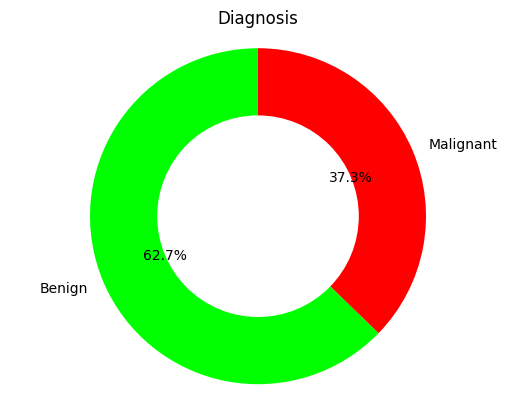

In [ ]:
# diagnosis[B] vs diagnosis[M]
diagnosis_labels = ['Benign', 'Malignant']
diagnosis_counts = data['diagnosis'].value_counts()
colors = ['lime', 'red']
plt.pie(diagnosis_counts, labels=diagnosis_labels, colors=colors, autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Diagnosis')
plt.axis('equal')
plt.show()


The donut chart above shows the diagnosis distribution, to get an idea about the class imbalance we need to create a bar chart.

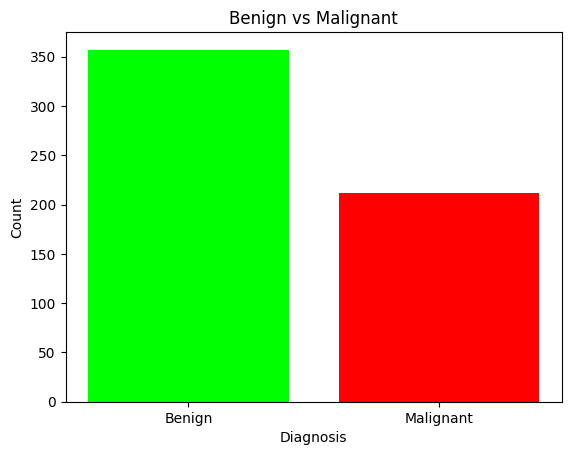

In [ ]:
diagnosis_labels = ['Benign', 'Malignant']
diagnosis_counts =  data['diagnosis'].value_counts()
colors = ['lime', 'red']
plt.bar(diagnosis_labels, diagnosis_counts, color=colors)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Benign vs Malignant')
plt.show()

the imbalance in data means that one class the "Benign" class is significantly more prevalent in the dataset compared to the other class the "Malignant" class
Now we need to determine the correlation between features to see which have high correlation and also to determine if there is any multicollinearity.

<ipython-input-13-a059b7032c6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-13-a059b7032c6c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

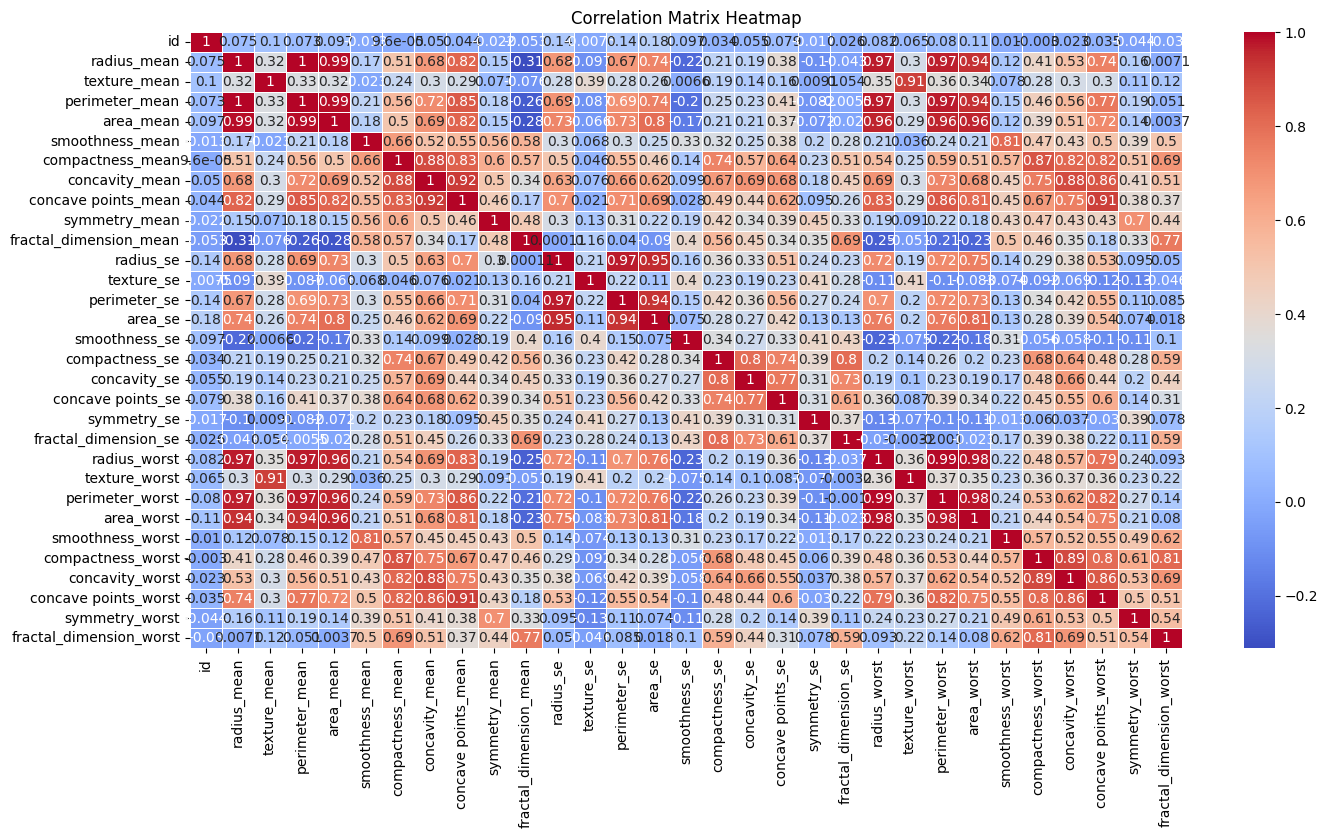

In [ ]:
# check correlation
print(data.corr())
# plot correlation
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Resutls of correlation matrix:
Strong positive correlations:radius_mean, perimeter_mean, area_mean are highly positively correlated with each other, which is expected since they all relate to the size of the tumor. compactness_mean, concavity_mean, and concave points_mean are also positively correlated with each other, which implies that these features may increase together.
Strong negative correlations:fractal_dimension_mean has a negative correlation with several other features, including radius_mean, perimeter_mean, area_mean, compactness_mean, and concavity_mean. This suggests that as the fractal dimension decreases.

In [ ]:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

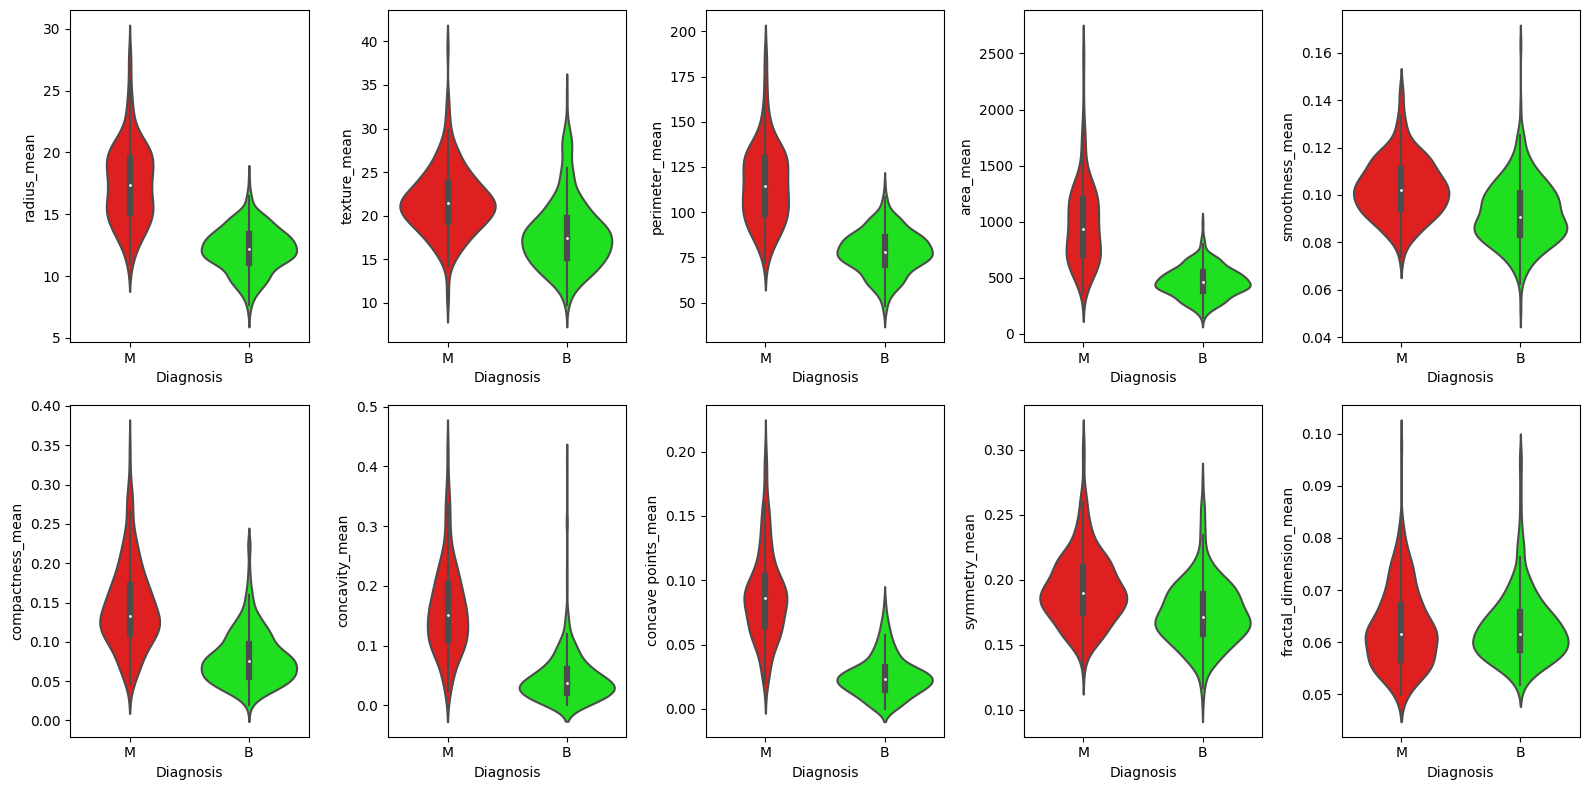

In [ ]:
#mean features vs mean diagnosis
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

colors = {'M': 'red', 'B': 'lime'}
plt.figure(figsize=(16, 8))
for i, feature in enumerate(mean_features, start=1):
    plt.subplot(2, 5, i)
    sns.violinplot(x='diagnosis', y=feature, data=data, palette=colors)
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


from the graphs above clearly all mean_features have a median greater than diagnosis one excpet with fractal_dimension_mean where its median is larger than diagnosis one.
Let's now seperate the dependent variable from dependent variables and drop "id"

In [ ]:
data.drop("id", axis=1, inplace=True)
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

Let's count the number of tumors

In [ ]:
total_counts = y.value_counts()

# Define colors for 'M' and 'B'
colors = {'M': '\033[91m', 'B': '\033[92m'}

# Format and print the value counts in the respective colors
for category, count in total_counts.items():
    color = colors.get(category, '\033[0m')  # Default to reset color
    print(f"{color}{category}: {count}\033[0m")

B: 357
M: 212


Let's count the total number of Xs

In [ ]:
X.value_counts()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.00000              0.1930         0.07818                 0.2241     1.5080      1.553         9.833    0.010190       0.010840        0.00000       0.000000           0.02659      0.004100              7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.00000               0.2932          0.09382                    1
14.860       16.94         

Now let's create KNeighbosClassifier with manhattan as metric.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y = pd.get_dummies(data,drop_first=True)
y = y['diagnosis_M']
from sklearn.metrics import classification_report
# Manhattan distance (L1 norm)
clf_manhattan = KNeighborsClassifier(metric='manhattan')
clf_manhattan.fit(X_train,y_train)
y_pred = clf_manhattan.predict(X_test)
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        73
           M       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# create the report
from tabulate import tabulate
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a table with colors
headers = ["class", "precision", "recall", "f1-score", "support"]
table = []
for class_name, metrics in report.items():
    if class_name in ["accuracy", "macro avg", "weighted avg"]:
        continue
    row = [class_name]
    for metric_name, value in metrics.items():
        if metric_name == "support":
            row.append(int(value))
        else:
            color = "\033[91m" if value < 0.5 else "\033[92m"
            row.append(f"{color}{value:.2f}\033[0m")
    table.append(row)

# Print the table
print(tabulate(table, headers, tablefmt="fancy_grid"))

╒═════════╤═════════════╤══════════╤════════════╤═══════════╕
│ class   │   precision │   recall │   f1-score │   support │
╞═════════╪═════════════╪══════════╪════════════╪═══════════╡
│ B       │        0.97 │     0.99 │       0.98 │        73 │
├─────────┼─────────────┼──────────┼────────────┼───────────┤
│ M       │        0.97 │     0.95 │       0.96 │        41 │
╘═════════╧═════════════╧══════════╧════════════╧═══════════╛


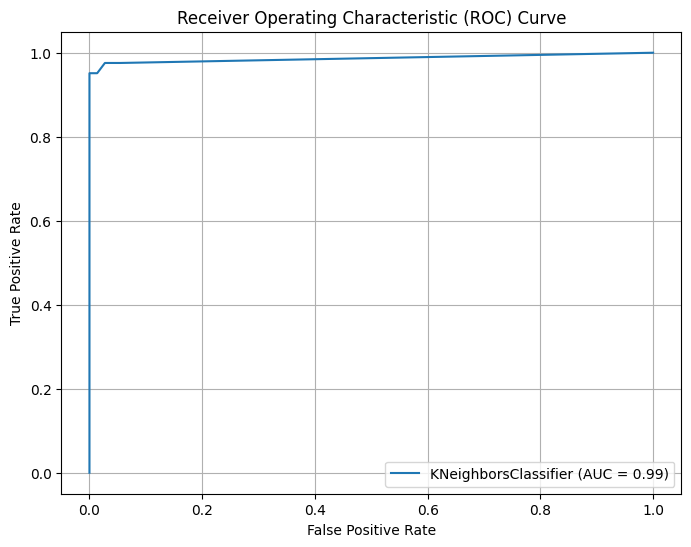

In [ ]:
# Display the ROC
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(clf_manhattan, X_test, y_test)
roc_display.figure_.set_size_inches(8, 6)  # Adjust figure size
roc_display.ax_.set_title('Receiver Operating Characteristic (ROC) Curve')
roc_display.ax_.legend(loc='lower right')
roc_display.ax_.grid()
roc_display.ax_.set_xlabel('False Positive Rate')
roc_display.ax_.set_ylabel('True Positive Rate')
plt.show()

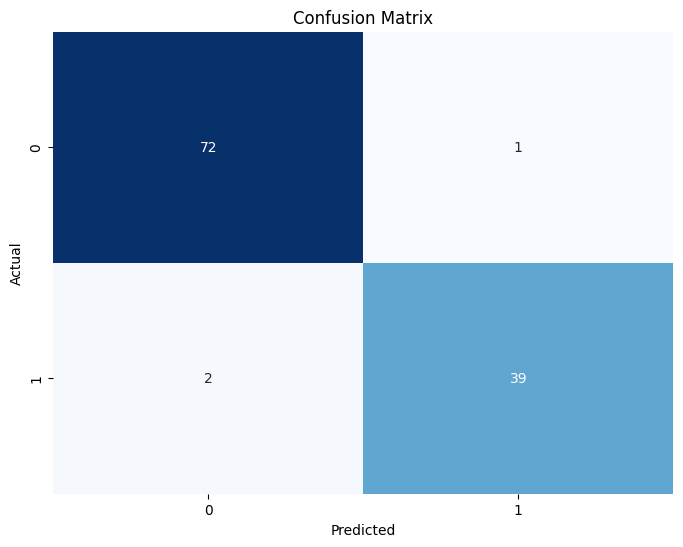

In [ ]:
# Plot the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hyperparameter Tuning: we need to improve the model performance using RandomzedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
clf = KNeighborsClassifier()
# RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=5, random_state=123)
random_search.fit(X_train, y_train)
# Get the best hyperparameters
best_hyp_params = random_search.best_params_
best_k = best_hyp_params['n_neighbors']
best_weights = best_hyp_params['weights']
best_p = best_hyp_params['p']
final_clf = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, p=best_p)
final_clf.fit(X_train, y_train)
y_pred = final_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)



              precision    recall  f1-score   support

           B       0.97      0.99      0.98        73
           M       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Final thought:
The performance of the improved model and the original model is the same. The hyperparameter tuning did not produce a significant improvement in the model performance
The ROC Curve Display, which includes the Area Under the Curve (AUC) value implies that the performance of the clf_manhattan classifier is almost perfect, with an AUC of 0.99. The confusion matrix demonstrates that there is 1 false positive meaning the classifier predicted malignant in cancer diagnosis incorrectly. And 2 false negative indicates that the classifier predicted incorrectly benign in cancer diagnosis.
 **The model or the classifier has a high discriminatory power and is effective at distinguishing between a benign tumor and malignant tumor.**

References

Kaggle.com

datacamp.com

deep learning with python (Francois Chollet)

introduction to python (dietel)